# Trabajo Final. Análisis de Datos

## Alumnos:

### Domenje, Carlos R.

### Fux, Santiago.

---

## DATASET: Uso de Taxis Yellow Cab en USA en el año 2020

**Problema.** Intentaremos responder las siguientes preguntas:

1. ¿Existe una manera de caracterizar los lugares más recurrentes para inicio / fin de viaje?

2. ¿Cómo son los viajes típicamente en distancia y tiempo?

3. ¿Podremos segmentar los viajes de alguna manera? (clusterización)

## 1. Obtención de datos

Para importar los datos, buscamos en la página web brindada por la cátedra:

- [Yellow Cab - Dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

**Nota**: El dataset utilizado será el del año 2020 y será descargado en una carpeta llamada "data" dentro de la carpeta contenedora del proyecto.

In [15]:
# Path del dataset a utilizar.
DATASET_PATH = "./data"

In [16]:
# listamos los archivos que se encuentran en el path
!ls {DATASET_PATH}

yellow_tripdata_2020-07.parquet


In [17]:
# Importamos las librerias necesarias para interactuar con el dataset.

#Pandas.
import pandas as pd

In [18]:
# El archivo del dataset tiene como formato .parquet, el cual es un archivo que esta orientado a columnas. 
# El dataset evaluado corresponde al mes de Julio de 2020
df = pd.read_parquet( "./data/yellow_tripdata_2020-07.parquet")

# Para obtener una primer aproximación de cada columna, 
# podemos utilizar la funcion head, que nos mostrará las 5 primeras filas con sus respectivas columnas del dataset
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-07-01 00:25:32,2020-07-01 00:33:39,1.0,1.50,1.0,N,238,75,2,8.0,0.5,0.5,0.00,0.0,0.3,9.30,0.0,None
1,1,2020-07-01 00:03:19,2020-07-01 00:25:43,1.0,9.50,1.0,N,138,216,1,26.5,0.5,0.5,0.00,0.0,0.3,27.80,0.0,None
2,2,2020-07-01 00:15:11,2020-07-01 00:29:24,1.0,5.85,1.0,N,230,88,2,18.5,0.5,0.5,0.00,0.0,0.3,22.30,2.5,None
3,2,2020-07-01 00:30:49,2020-07-01 00:38:26,1.0,1.90,1.0,N,88,232,1,8.0,0.5,0.5,2.36,0.0,0.3,14.16,2.5,None
4,2,2020-07-01 00:31:26,2020-07-01 00:38:02,1.0,1.25,1.0,N,37,17,2,6.5,0.5,0.5,0.00,0.0,0.3,7.80,0.0,None


In [19]:
## Para obtener una descripción del tipo de datos que contiene cada columna, utilizamos la funcion info()
# Podemos además, obtener una idea general de cuantos datos no nulos contiene.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800412 entries, 0 to 800411
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               800412 non-null  int64         
 1   tpep_pickup_datetime   800412 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  800412 non-null  datetime64[ns]
 3   passenger_count        737565 non-null  float64       
 4   trip_distance          800412 non-null  float64       
 5   RatecodeID             737565 non-null  float64       
 6   store_and_fwd_flag     737565 non-null  object        
 7   PULocationID           800412 non-null  int64         
 8   DOLocationID           800412 non-null  int64         
 9   payment_type           800412 non-null  int64         
 10  fare_amount            800412 non-null  float64       
 11  extra                  800412 non-null  float64       
 12  mta_tax                800412 non-null  floa

In [20]:
# La función describe() nos da una vista general de valores de cantidades de datos, media, desv. standard, valores min y max de cada columna.
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,800412.000000,737565.000000,800412.000000,737565.000000,800412.000000,800412.000000,800412.000000,800412.000000,800412.000000,800412.000000,800412.000000,800412.000000,800412.000000,800412.000000,737565.000000
mean,1.645142,1.378401,4.304165,1.046801,160.061218,156.104931,1.246323,13.438400,1.003705,0.492124,1.789151,0.316874,0.296943,18.631460,2.145680
std,0.478961,1.039790,473.708961,1.203844,68.563400,72.990234,0.620122,13.675661,1.240157,0.078519,2.643472,1.533511,0.041673,15.060771,0.898707
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-391.500000,-4.500000,-0.500000,-25.830000,-18.360000,-0.300000,-397.600000,-2.500000
25%,1.000000,1.000000,1.000000,1.000000,107.000000,90.000000,1.000000,6.000000,0.000000,0.500000,0.000000,0.000000,0.300000,10.800000,2.500000
50%,2.000000,1.000000,1.790000,1.000000,161.000000,161.000000,1.000000,9.000000,0.500000,0.500000,1.660000,0.000000,0.300000,14.160000,2.500000
75%,2.000000,1.000000,3.400000,1.000000,234.000000,233.000000,2.000000,15.000000,2.500000,0.500000,2.750000,0.000000,0.300000,20.550000,2.500000
max,6.000000,9.000000,256069.130000,99.000000,265.000000,265.000000,4.000000,1995.000000,90.060000,3.300000,1001.000000,126.120000,0.300000,1995.000000,2.500000


### Descripción de Columnas del Dataset.


In [21]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                      object
dtype: object

In [22]:
# funcion para plotear las distribuciones de los atributos
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,20))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

# funcion para imprimir nulos
def print_null_info(col):
    print(f'Cantidad de nulos: {col.isnull().sum()}')

# funcion para imprimir datos de v. categoricas
def print_categorical(col):
    print(f'Ordinalidad: {col.unique()}')
    print_null_info(col)
    print('Ocurrencias:')
    print(col.value_counts().sort_values())

NameError: name 'plt' is not defined

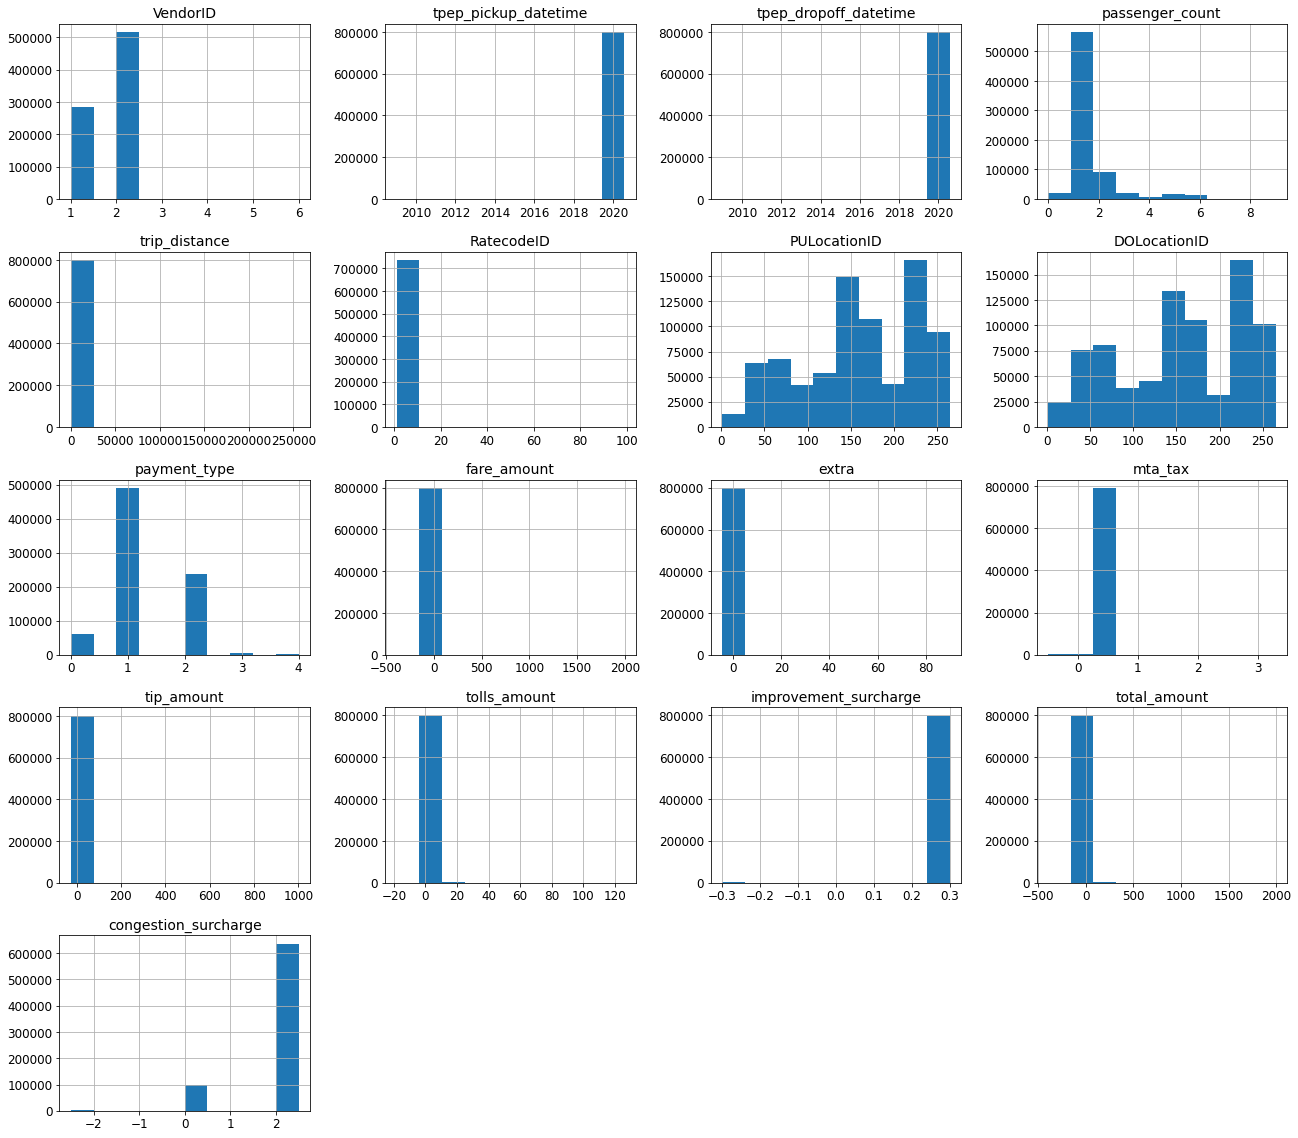

In [23]:
#imprimo distribuciones 
display_dataset_distributions(df)


- **VendorID**: Proveedor de servicios de tecnologias en taxis (T-PEP)
    - Tipo de dato: Categórica ordinal  
    - Tipo de variable: Entrada  


In [ ]:
print_categorical(df.VendorID)

Ordinalidad: [1 2 6 5]
Cantidad de nulos: 0
Ocurrencias:
5         3
6        17
1    284110
2    516282
Name: VendorID, dtype: int64



- **tpep_pickup_datetime**: Fecha y hora en el cual el reloj fue activado al iniciar un viaje.
    - Tipo de dato: Timestamp compuesto  
    - Tipo de variable: Entrada  

    - Ejemplo del dato en el dataset: 2020-07-01 00:25:32


In [ ]:
print_null_info(df.tpep_pickup_datetime)

Cantidad de nulos: 0


- **tpep_dropoff_datetime**: Fecha y hora en el cual el reloj fue desactivador al finalizar un viaje.
    - Tipo de dato: Timestamp compuesto
    - Tipo de variable: Entrada  / Salida

    - Ejemplo del dato en el dataset: 2020-07-01 00:33:39


In [ ]:
print_null_info(df.tpep_dropoff_datetime)

Cantidad de nulos: 0


- **passenger_count**: El número de pasajeros en el vehiculo. (Es un dato que lo ingresa el conductor.)
    - Tipo de dato: Numérico 
    - Tipo de variable: Entrada
    - Ejemplo del dato en el dataset: 1.0

In [ ]:
print_null_info(df.passenger_count)

Cantidad de nulos: 62847



- **trip_distance**: La distancia del viaje transcurrido en millas reportada por el taxímetro. 
    - Tipo de dato: Numérico 
    - Tipo de variable: Entrada  

    - Ejemplo del dato en el dataset: 1.50


In [ ]:
print_null_info(df.trip_distance)

Cantidad de nulos: 0


- **PULocationID**: TLC Zona en la que el taxímetro se activó.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada / Salida

    - Ejemplo del dato en el dataset: 238


In [ ]:
print_categorical(df.PULocationID)
print(f'Total categorías: {len(df.PULocationID.unique())}')

Ordinalidad: [238 138 230  88  37 140 137 166 239 132  79  45 263 170 141 249 142  43
 114 186  68  90 164  74  75 107  25  13 211 179 143 151 148  48 125 162
  50 234   7 231 229 262  41  87  80 233 244 193 224 247 113 183 236 259
 237 116 100 258  42  70 264 161 181  49  10 168 246 146 158 235 226 232
 250 243 163 152 144 255 167  24  69 242  47  65  76   4  97 165 145 213
  32  18  39  51 261 169  89  38  61 159 129 225 177 188  52 207 134  81
 171  95 101  33  56 117 265 248 133  14 196 260 257  60 220 126  55  78
 197  82 123 209 218   9 223 217 157  98 130 111 222 228  35 215  40  62
  72 155 252  91 256 136 192 216  17  77 178 227 106  22  34  67  83 208
 219  19 124 241  29  63  28  92 127 185  26 174 139 102  64 108   1 182
 200 119 128  54  16 210  94  20 175 202 112  44  93  12  71 121 195 191
 153  86  36 189 203 212   3 204  85 254 149 205  96 147 131 160 198 135
 150  66  57 194   8 173  15   6 184 180 122  84 115 221 190  53  59   2
  27 201  73  21  31  11 214 120 118  


- **DOLocationID**: TLC Zona en la que el taxímetro se desactivó.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada / Salida 

    - Ejemplo del dato en el dataset: 75


In [ ]:
print_categorical(df.DOLocationID)
print(f'Total categorías: {len(df.PULocationID.unique())}')

Ordinalidad: [ 75 216  88 232  17  61 260  41 142 249 112 195  45 263 116 141 254 140
  48  74 186 262 237 239 234 230 225 231  79 166 236   7  97 170 164 248
 128 238   4  25  89  13 137   8 100 162  80 247 148 158  37  16 145  70
 156 107 119 159 265  26 144 217 229 261 173  96 244 143 193 151 246  76
 191 259 224 189  65  43  64 226 188 135 120  68 113 129 152 212  50  86
 125 114 146  28 102  90 264  39 123  14 196 198 233 256  42 177  49  22
  10  35 132  24 258 211 161 255  81  56 117 165 240 169  71 241 126  94
  62 210  69 138 168  63  21  91  87 228 130 163  32  18  82 223 174 227
  60  19 213 203 219 181  85  67  55  36  34 243 197 157 127  73 179  54
  33 209  66 147   1 235  92  51 131 242 136 160 182 101 220  95 121  47
  12  93 207  78 202 171  53 133 111  20  83 190 252 192 124  72 185  29
 257 167 150  40 222  15 122 205  98  77 134 251 106  11 218 153  57 200
 215  46   9  52 155 175 178 208 118 139 183 250   3  23  44 149  58 108
  31 201  84 204 194 115  38 176   6 1


- **RatecodeID**:  El código de tarifa final vigente al final del viaje.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada  

    - 1= Standard rate
    - 2= JFK 
    - 3= Newark
    - 4= Nassau or Westchester
    - 5= Negotiated fare
    - 6= Group ride


In [ ]:
print_categorical(df.RatecodeID)

Ordinalidad: [ 1.  2.  4.  5.  3. 99.  6. nan]
Cantidad de nulos: 62847
Ocurrencias:
6.0          4
99.0       104
4.0        668
3.0        826
5.0       3470
2.0       6771
1.0     725722
Name: RatecodeID, dtype: int64


- **store_and_fwd_flag**:  Este flag indica si el registro de viaje se llevó a cabo en la memoria del dispositivo del vehiculo antes de enviar al proveedor, también conocido como "almacenar y reenviar", porque el vehiculo no tenia conexion al servidor.
    - Tipo de dato: Categórica  
    - Tipo de variable: Entrada  

    - Y= Almacenar y reenviar informacion.
    - N= No almacenar y enviar informacion.


In [ ]:
print_categorical(df.store_and_fwd_flag)

Ordinalidad: ['N' 'Y' None]
Cantidad de nulos: 62847
Ocurrencias:
Y      7550
N    730015
Name: store_and_fwd_flag, dtype: int64



- **payment_type**: Un código numérico que significa cómo el pasajero pagó por el viaje.
    - Tipo de dato: Categórica ordinal  
    - Tipo de variable: Entrada  

    - 1= Credit card
    - 2= Cash
    - 3= No charge
    - 4= Dispute
    - 5= Unknown
    - 6= Voided trip


In [ ]:
print_categorical(df.payment_type)

Ordinalidad: [2 1 4 3 0]
Cantidad de nulos: 0
Ocurrencias:
4      3312
3      6819
0     62847
2    236433
1    491001
Name: payment_type, dtype: int64


- **fare_amount**: La tarifa de tiempo y distancia calculada por el taxímetro.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 8.0


In [ ]:
print_null_info(df.fare_amount)

Cantidad de nulos: 0


- **Extra**: Varios extras y recargos. Actualmente, esto solo incluye los cargos de $0.50 y $1 por la hora pico y por la noche.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.5


In [29]:
print_null_info(df.extra)
print_categorical(df.extra)

Cantidad de nulos: 0
Ordinalidad: [ 0.5   3.    0.    2.5  -0.5   3.5   1.    1.3   0.8   4.5  -1.    7.
  1.8  -4.5   5.3   2.    2.05 12.78 47.4   0.3   3.3  -2.5   6.5  -2.
 90.06 -0.45  0.99  4.08  3.46  2.75  5.03  2.45  1.39  3.31  0.93  2.23
  0.76  4.21  0.7   0.63  2.92  1.11  5.36  1.47]
Cantidad de nulos: 0
Ocurrencias:
 2.45          1
 4.21          1
 0.76          1
 2.23          1
 0.93          1
 3.31          1
 1.39          1
 6.50          1
 5.03          1
 5.36          1
 3.46          1
 0.99          1
-0.45          1
 90.06         1
-2.00          1
 3.30          1
 47.40         1
 12.78         1
 2.05          1
 4.08          1
 0.70          1
 1.47          1
 0.63          1
 2.92          1
 1.11          1
 5.30          1
 2.75          2
-2.50          2
 2.00          4
 0.30         12
-4.50         21
 1.80         42
 1.30         52
 0.80        151
 7.00        306
-1.00        693
-0.50        883
 4.50       1101
 3.00      32668
 3.5


- **mta_tax**: Impuesto MTA de $0.50 que se activa automáticamente según la tasa de uso del medidor.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.5


In [30]:
print_null_info(df.mta_tax)
print_categorical(df.mta_tax)

Cantidad de nulos: 0
Ordinalidad: [ 0.5 -0.5  0.   3.3  2.8]
Cantidad de nulos: 0
Ocurrencias:
 3.3         1
 2.8         1
-0.5      3633
 0.0      5353
 0.5    791424
Name: mta_tax, dtype: int64


- **improvement_surcharge**: Recargo de mejora de $ 0.30 en viaje en el descenso de bandera. El recargo por mejora comenzó a cobrarse en 2015.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.3


In [26]:
print_null_info(df.improvement_surcharge)
print_categorical(df.improvement_surcharge)

Cantidad de nulos: 0
Ordinalidad: [ 0.3 -0.3  0. ]
Cantidad de nulos: 0
Ocurrencias:
 0.0       784
-0.3      3686
 0.3    795942
Name: improvement_surcharge, dtype: int64


- **tip_amount**: Importe de la propina: este campo se completa automáticamente para las propinas de tarjetas de crédito. Las propinas en efectivo no están incluidas.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.00  


In [28]:
print_null_info(df.tip_amount)
print_categorical(df.tip_amount)

Cantidad de nulos: 0
Ordinalidad: [ 0.    2.36  6.09 ... 11.09 12.93 17.32]
Cantidad de nulos: 0
Ocurrencias:
 17.32         1
 28.30         1
 20.42         1
 19.20         1
-20.80         1
           ...  
 3.00       9609
 2.00      29329
 2.75      34794
 1.00      37223
 0.00     306113
Name: tip_amount, Length: 2043, dtype: int64


- **tolls_amount**: Importe total de todos los peajes pagados en el viaje.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 0.00


In [31]:
print_null_info(df.tolls_amount)


Cantidad de nulos: 0
Ordinalidad: [ 0.0000e+00  6.1200e+00  1.2240e+01  1.1750e+01  5.6200e+00  1.3750e+01
  1.8360e+01 -6.1200e+00  8.4100e+00  2.8000e+00  1.9000e+01  2.2900e+00
  1.5900e+01 -1.8360e+01  1.8530e+01  1.6250e+01  1.0700e+01  1.9870e+01
  1.8250e+01  3.0990e+01  3.0000e+00  2.6870e+01  2.5990e+01  7.0000e+00
  6.9200e+00  5.0000e+00  2.6240e+01  2.1000e+01  1.1840e+01  3.2890e+01
  1.7750e+01  2.8000e+01  1.5450e+01  1.8760e+01  1.3900e+01  1.7870e+01
  9.5000e+00  1.0500e+01  6.2100e+00  8.1200e+00  2.1370e+01  8.5000e+00
  1.6000e+01  1.9510e+01  1.6200e+01  7.7200e+00  6.1800e+00  2.7500e+01
  1.3300e+01  2.0750e+01  2.0000e+01  7.1200e+00  1.8750e+01  1.6040e+01
  1.9750e+01  1.2940e+01  2.7000e+01  2.3500e+01  1.6340e+01  2.0870e+01
  2.5000e+01  1.4530e+01  1.5000e+01  4.5800e+00  1.8650e+01 -8.4100e+00
  2.0670e+01  2.3990e+01  1.5120e+01  5.7600e+00  4.3370e+01  3.0950e+01
  3.1000e+01 -2.8000e+00  1.5350e+01  2.5500e+01  1.6750e+01  1.8620e+01
  6.0000e+00  2.2


- **total_amount**: El monto total cobrado a los pasajeros. No incluye propinas en efectivo.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 9.30


In [ ]:
print_null_info(df.total_amount)

Cantidad de nulos: 0


- **congestion_surcharge**: Importe total recaudado en el viaje por el recargo por congestión del Estado de Nueva York.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 0.00


In [27]:
print_null_info(df.congestion_surcharge)


Cantidad de nulos: 62847
Ordinalidad: [ 0.   2.5 -2.5  0.8  0.5  nan]
Cantidad de nulos: 62847
Ocurrencias:
 0.8         1
 0.5         1
-2.5      2798
 0.0     98936
 2.5    635829
Name: congestion_surcharge, dtype: int64


- **airport_fee**: $1.25 para recoger solo en los aeropuertos LaGuardia y John F. Kennedy
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida
    - Ejemplo del dato en el dataset: None

In [ ]:
print_null_info(df.airport_fee)

Cantidad de nulos: 800412


Puntos a analizar en el dataset (Santaigo 2022-07-29)
-----------------------------------------------------

 0   VendorID               800412 non-null  SJF: No aporta valor  
 1   tpep_pickup_datetime   800412 non-null  SJF: Se puede descomponer en día de la semana y hora?
 2   tpep_dropoff_datetime  800412 non-null  SJF: Se puede descomponer en día de la semana y hora?
 3   passenger_count        737565 non-null  SJF: Contiene nulos -> Pero casi todos son de 1 pasajeron en general. Hacer una regresión daría desbalanceado
 4   trip_distance          800412 non-null  float64       SJF: ok
 5   RatecodeID             737565 non-null  float64  SJF: Super desbalanceada -> Se puede quitar?     
 6   store_and_fwd_flag     737565 non-null  object       SJF: No aporta informacion 
 7   PULocationID           800412 non-null  int64         SJF: Cómo bajar su número (259 categorias) -> Binary encoding + categoría others?
 8   DOLocationID           800412 non-null  int64          SJF: Cómo bajar su número (259 categorias) -> Binary encoding + categoría others? 
 9   payment_type           800412 non-null  int64         SJF: ok
 10  fare_amount            800412 non-null  float64       SJF: ok
 11  extra                  800412 non-null  float64       SJF: OK. Se puede censurar (crap) para quitar outliers
 12  mta_tax                800412 non-null  float64       SJF: Muy desbalanceado. Conviene quitar? Hay valores negativos (podar?)
 13  tip_amount             800412 non-null  float64       SJF: Hay valores negativos (podar?). Se podrían armar bins para evitar outliers?
 14  tolls_amount           800412 non-null  float64       SJF_ Muy desbalanceada
 15  improvement_surcharge  800412 non-null  float64       SJF: Super desbalanceado. Conviene quitar? Hay valores negativos (podar?)
 16  total_amount           800412 non-null  float64       SJF: Es redundante? Conviene quitar?
 17  congestion_surcharge   737565 non-null  float64       Muy desbalanceada. Puede discretizarse en 0/1 directamente?
 18  airport_fee            0 non-null       object  SJF: Quitar no tiene info
